# VADER Sentiment Analysis

Runs VADER Sentiment Model on pre- and post-GenAI datasets.  Pre-GenAI dataset must be imported as "cleaned_pre_ai.csv" and post-GenAI dataset must be imported as "post-chat-cleaned.csv".

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

In [2]:
# import data for post-genAI
postData = pd.read_csv("post-chat-cleaned.csv")
postData

,Unnamed: 0,Text
0,0,From Studio Gangster to Synthetic Gangster 🎤.....
1,1,Took me some time to find this. I build this #...
2,2,Mind blowing next wave #generativeai platform...
3,3,Open Source Generative AI Image Specialist Sta...
4,4,Are you an #HR leader considering which future...
...,...,...
56216,56216,"Understanding Generative AI, Its Impacts and L..."
56217,56217,Y ya puedes empezar a crear #arte con @thegeni...
56218,56218,"NVIDIA researchers have developed GANverse3D, ..."
56219,56219,Tech Trend 2022: เทรนด์เทคโนโลยีสำหรับปี 2022 ...


In [3]:
# install VADER Sentiment Model and run analysis on post-GenAI data
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
  try:
    return analyzer.polarity_scores(text)['compound']
  except TypeError:
    return None # Handle cases where text is not a string

postData['sentiment_score'] = postData['Text'].apply(get_sentiment_score)

display(postData.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


,Unnamed: 0,Text,sentiment_score
0,0,From Studio Gangster to Synthetic Gangster 🎤.....,-0.0516
1,1,Took me some time to find this. I build this #...,0.0000
2,2,Mind blowing next wave #generativeai platform...,0.0000
3,3,Open Source Generative AI Image Specialist Sta...,0.0000
4,4,Are you an #HR leader considering which future...,0.0000


In [4]:
# categorize sentiment values as positive, neutral, and negative
def categorize_sentiment(score):
  if score >= 0.05:
    return 'Positive'
  elif score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

postData['sentiment_category'] = postData['sentiment_score'].apply(categorize_sentiment)

display(postData['sentiment_category'].value_counts())

,count
sentiment_category,
Positive,31415
Neutral,19332
Negative,5474


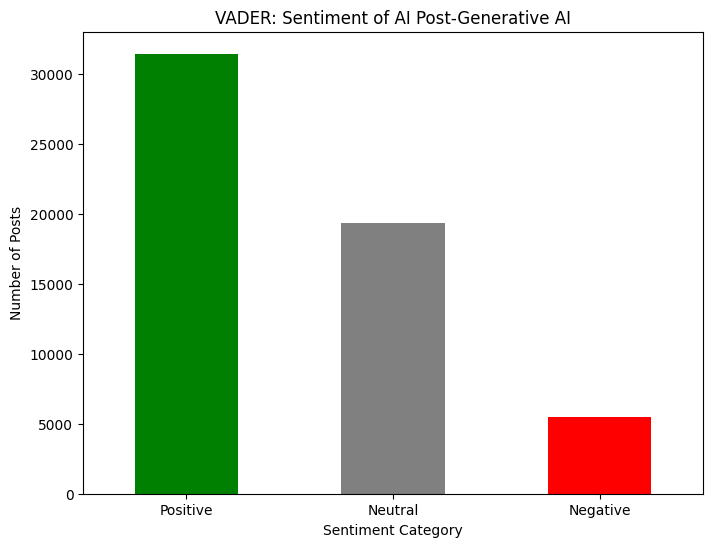

In [13]:
# show categories as graph
sentiment_counts = postData['sentiment_category'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('VADER: Sentiment of AI Post-Generative AI')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

In [16]:
# run same analysis but with pre-GenAI data
preData = pd.read_csv("cleaned_pre_ai.csv")
display(preData.head())

preData['sentiment_score'] = preData['tweet'].apply(get_sentiment_score)
display(preData.head())

preData['sentiment_category'] = preData['sentiment_score'].apply(categorize_sentiment)
display(preData['sentiment_category'].value_counts())

,tweet
0,What topic could spark human dialogue on AI? A...
1,I think #ArtificialIntelligence will augment h...
2,What Managers Need to Know About Artificial In...
3,4 ways Artificial Intelligence changes the gam...
4,Artificial Intelligence can Shape the Future o...


,tweet,sentiment_score
0,What topic could spark human dialogue on AI? A...,0.6124
1,I think #ArtificialIntelligence will augment h...,0.0000
2,What Managers Need to Know About Artificial In...,0.4767
3,4 ways Artificial Intelligence changes the gam...,0.4767
4,Artificial Intelligence can Shape the Future o...,0.4767


,count
sentiment_category,
Positive,656061
Neutral,176630
Negative,60385


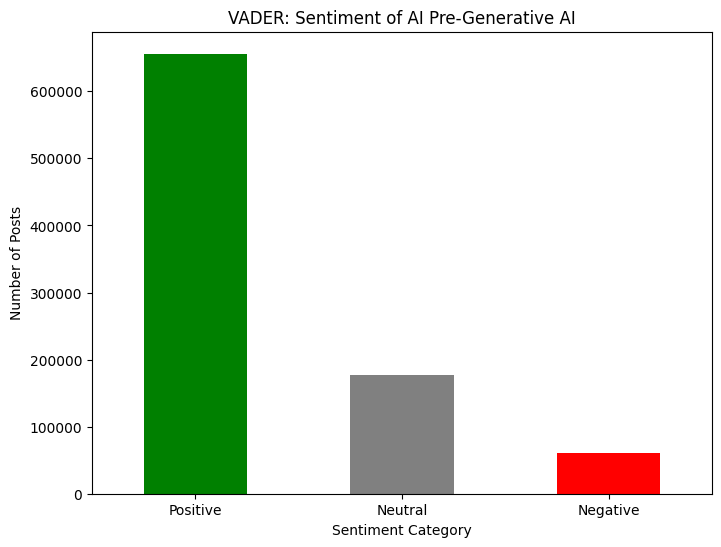

In [14]:
# plot data
pre_sentiment_counts = preData['sentiment_category'].value_counts()

plt.figure(figsize=(8, 6))
pre_sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('VADER: Sentiment of AI Pre-Generative AI')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()